# Analysis of marketing performance for a mobile application

The goal of the study is to find out why the company that launched the Procrastinate Pro+ application on the market has been suffering losses for the last several months despite significant investments in advertising. 

The dataset contains information about site visits, orders and advertising costs.


Project structure: 
- Data preprocessing.
- Preparation of functions required to analyze marketing metrics (LTV, ROI, retention and conversion).
- Exploratory data analysis. Creation of user profiles. Evaluation of traffic sources.  
- Evaluation of advertising ROI and marketing metrics on different slices of data.
- Conclusions and recommendations.

# Data preprocessing

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# loading datasets

visits, orders, costs = (pd.read_csv('visits_info_short.csv'), 
                             pd.read_csv('orders_info_short.csv'),
                             pd.read_csv('costs_info_short.csv') 
                            )

display(visits.head(), orders.head(), costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
# dataset general information

display(visits.info(), orders.info(), costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

None

None

None

In [4]:
# setting column headers to camel case without spaces.

visits = visits.rename(columns={'User Id':'user_id', 'Region':'region', 'Device':'device', 'Channel':'channel', 'Session Start':'session_start', 'Session End':'session_end'})
orders = orders.rename(columns={'User Id':'user_id', 'Event Dt': 'event_dt', 'Revenue':'revenue'})
costs = costs.rename(columns={'Channel':'channel'})
display(visits.head(), orders.head(), costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [5]:
# setting the columns with dates to datetime

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [6]:
# checking for missing values

for df in visits, orders, costs:
    display(df.isna().mean())

user_id          0.0
region           0.0
device           0.0
channel          0.0
session_start    0.0
session_end      0.0
dtype: float64

user_id     0.0
event_dt    0.0
revenue     0.0
dtype: float64

dt         0.0
channel    0.0
costs      0.0
dtype: float64

In [7]:
# checking for duplicates

for df in visits, orders, costs:
    display(df.duplicated().sum())

0

0

0

## summary
The columns with dates have been coverted to datetime data type. The columns were also renamed so that there are no spaces in them and the column names look identical. For each dataset, it has been made sure there are no obvious duplicates or missing values.

# Functions for calculating and analyzing LTV, ROI, retention and conversion.

In [8]:
# fuction for creating profiles
def get_profiles(visits, orders, costs):

    # first visit parameters
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for the cohort analysis, we determine the date of the first visit
    # and the first day of the month in which the visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # add an attribute for paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # count the number of unique users
    # with the same source and date of acquisition
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # Combine ad spend and user acquisition rates
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # divide advertising costs by the number of users attracted
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # add the acquisition cost to profiles
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of acquiring organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
# retention function

def get_retention(
    profiles,
    visits,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # add 'payer' column to the list given to dimensions
    dimensions = ['payer'] + dimensions

    # exclude users who didn't reach the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # collecting raw data to calculate the retention rate
    result_raw = result_raw.merge(
        visits[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # function for grouping the df by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # retention dataframe
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    #  retention dynamics dataframe
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both dataframes and raw data
    return result_raw, result_grouped, result_in_time

In [10]:
# conversion function

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who didn't make it to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # determine the date and time of the first purchase for each user
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # add purchase data to profiles
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # calculate the Lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # group by cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # function for grouping the df by desired features
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # divide each cell in the row by the cohort size
        # and get the conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # get the conversion df
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # for the conversion dynamics df, remove 'cohort' from dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # df with the conversion dynamics
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # return both dataframes and raw data
    return result_raw, result_grouped, result_in_time

In [11]:
# function for LTV and ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # exclude users who didn't make it to the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # add purchases data to profiles
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # calculate user lifetime for each purchase
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # group by cohort, if there is nothing in dimensions
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # function of grouping by desired features
    def group_by_dimensions(df, dims, horizon_days):
        
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # the amount of revenue with accumulation
        result = result.fillna(0).cumsum(axis=1)
        # calculate cohort sizes
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # combine cohort sizes and revenue table
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # calculate LTV: divide each "cell" in the row by the cohort size
        result = result.div(result['cohort_size'], axis=0)
        # exclude all lifetimes that exceed the analysis horizon
        result = result[['cohort_size'] + list(range(horizon_days))]
        # restore cohort sizes
        result['cohort_size'] = cohort_sizes

        # build a dataframe with user data and CAC values, 
        # adding parameters from dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # calculate average CAC by parameters from dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # calculate ROI: divide LTV by CAC
        roi = result.div(cac['cac'], axis=0)

        # delete rows with infinite ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # restore cohort sizes in the ROI table
        roi['cohort_size'] = cohort_sizes

        # add CAC to the ROI table
        roi['cac'] = cac['cac']

        # leave cohort sizes, CACs and ROI 
        #in lifetimes that do not exceed the analysis horizon
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # return LTV and ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # for tables with dynamics, remove 'cohort' from dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # LTV and ROI dynamics
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # raw data
        result_grouped,  # LTV
        result_in_time,  # LTV dynamics
        roi_grouped,  # ROI
        roi_in_time,  # ROI dynamics
    ) 

In [12]:
# function for smoothing the dataframe

def filter_data(df, window):
    # for each column we apply a rolling average
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [13]:
# function for visualizing the retention

def plot_retention(retention, retention_history, horizon, window=7):

    # set the grid size for the graphs
    plt.figure(figsize=(15, 10))

    # exclude cohort sizes and first-day retention
    retention = retention.drop(columns=['cohort_size', 0])
    # leave only the necessary lifetime in the dynamics table
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # if there is only 'payer' in the indexes of the retention table,
    # add a second characteristic - cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # plot the retention curves of paying users
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of paying users')

    # plot the retention curves of non-paying users
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('Retention of non-paying users')

    # dynamics of paying user retention
    ax3 = plt.subplot(2, 2, 3)
    # get the column names for the pivot table
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # filter the data and plot the chart
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title(
        'Dynamics of paying user retention for day {}'.format(
            horizon
        )
    )

    # dynamics of non-paying user retention
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # filter the data and plot the chart
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Acquisition date')
    plt.title(
        'Dynamics of paying user retention for day {}'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [14]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

     # set the grid size for the graphs
    plt.figure(figsize=(15, 5))

    # dropping the cohort sizes
    conversion = conversion.drop(columns=['cohort_size'])
    # leaving only the necessary lifetime in the dynmics table
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # conversion graphs
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('User conversion')

    # conversion dynamics
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of user conversion for day {}'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
# function for visualizing LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # set the grid size for the graphs
    plt.figure(figsize=(20, 10))

    # remove cohort sizes from ltv dataframe
    ltv = ltv.drop(columns=['cohort_size'])
    # leaving only necessary lifetime in ltv dynamics
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # create a separate frame for acquisition cost
    cac_history = roi_history[['cac']]

    #  exclude cohort sizes and cac from the roi table
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # leave only the necessary lifetime in the roi dynamics table
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # visualizing ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('LTV')

    # visualizing ltv dynamics
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of user LTV for day {}'.format(horizon))

    # visualizing cac dynamics
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Acquisition date')
    plt.title('CAC dynamics')

    # visualizing roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Lifetime')
    plt.title('ROI')

    # visualizing roi dynamics
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Acquisition date')
    plt.title('Dynamics of user ROI for day {}'.format(horizon))

    plt.tight_layout()
    plt.show() 

## summary
At this step, the functions for marketing metrics and their visualizations have been defined to be used in further analysis.

# Exploratory data analysis

In [16]:
# using the function to get user profiles 
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


We obtained a table of user profiles containing for each user information about their first visit, acquisition channel and acquisition cost, device type, country, week and month of visit, and whether a user is paying or not.

In [17]:
# checking min and max acquisition dates

profiles['dt'].min(), profiles['dt'].max()

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

Minimum user acquisition date is May 1, 2019г, maximum – October 26, 2019. The dates match those in the dataset description.

In [18]:
# paying users breakdown by region

paying_users = (profiles.groupby(by='region')
                .agg({'user_id': 'count', 'payer': 'mean'})
                .sort_values(by='payer', ascending=False)
                .reset_index()
               )
paying_users

,region,user_id,payer
0,United States,100002,0.069019
1,Germany,14981,0.041119
2,UK,17575,0.039829
3,France,17450,0.037994


The largest share of paying users is from the US, the smallest – from France.

In [19]:
# paying users breakdown by device

paying_user_devices = (profiles.groupby(by='device')
                .agg({'user_id': 'count', 'payer': 'mean'})
                .sort_values(by='payer', ascending=False)
                .reset_index()
               )
paying_user_devices

,device,user_id,payer
0,Mac,30042,0.063644
1,iPhone,54479,0.062079
2,Android,35032,0.058518
3,PC,30455,0.050468


Clients use the service from laptops and mobile devices. Paying users prefer Apple laptops and iPhones. 

In [20]:
# paying users breakdown by acquisition channel

paying_user_channels = (profiles.groupby(by='channel')
                .agg({'user_id': 'count', 'payer': 'mean'})
                .sort_values(by='payer', ascending=False)
                .reset_index()
               )
paying_user_channels

,channel,user_id,payer
0,FaceBoom,29144,0.122049
1,AdNonSense,3880,0.113402
2,lambdaMediaAds,2149,0.104700
3,TipTop,19561,0.096007
4,RocketSuperAds,4448,0.079137
5,WahooNetBanner,8553,0.052964
6,YRabbit,4312,0.038265
7,MediaTornado,4364,0.035747
8,LeapBob,8553,0.030633
9,OppleCreativeMedia,8605,0.027077


The top 3 channels that brought in the most paying users are FaceBoom, AdNonSense, and lambdaMediaAds. It should be noted that FaceBoom is the clear leader because it brought in the most users among the paid channels and also has the highest percentage of paying users.

## summary

At this stage, user profiles were created, and the minimum (May 1, 2019) and maximum (October 26, 2019) user acquisition dates were determined. It was found that users come to the application from four different countries. The largest share of paying users is from the USA, and the smallest is from France. It was discovered that customers use the application on both desktop and mobile devices. Among desktop users, paying users prefer MacBooks, and among mobile phone users, they prefer iPhones. There are the fewest paying customers among PC users. It was also found that in addition to organic traffic, the application attracts users through 10 paid channels, with FaceBoom being the clear leader among them.

# Marketing

In [21]:
# total marketing costs

costs_total = costs['costs'].sum().round()
print(f'Total marketing costs: {costs_total}')

Total marketing costs: 105497.0


In [22]:
# costs breakdown my acquisition channles

costs_by_channel = (costs.groupby('channel')['costs'].sum()
                    .sort_values(ascending=False)
                    .reset_index()
                   )
costs_by_channel['costs_share'] = (costs_by_channel['costs'] / costs_total).round(2)
costs_by_channel

,channel,costs,costs_share
0,TipTop,54751.30,0.52
1,FaceBoom,32445.60,0.31
2,WahooNetBanner,5151.00,0.05
3,AdNonSense,3911.25,0.04
4,OppleCreativeMedia,2151.25,0.02
5,RocketSuperAds,1833.00,0.02
6,LeapBob,1797.60,0.02
7,lambdaMediaAds,1557.60,0.01
8,MediaTornado,954.48,0.01
9,YRabbit,944.22,0.01


Two channels stand out: TipTop and FaceBoom. TipTop accounts for half of the entire advertising budget.

In [23]:
# weeks and months to plot costs over time

costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')
costs.head()

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,2019-05-01,2019-04-25
1,2019-05-02,FaceBoom,78.1,2019-05-01,2019-05-02
2,2019-05-03,FaceBoom,85.8,2019-05-01,2019-05-02
3,2019-05-04,FaceBoom,136.4,2019-05-01,2019-05-02
4,2019-05-05,FaceBoom,122.1,2019-05-01,2019-05-02


In [24]:
# costs by source and week, and by source and month

costs_by_week = costs.pivot_table(index='channel', columns='week', values='costs', aggfunc='sum')
costs_by_month = costs.pivot_table(index='channel', columns='month', values='costs', aggfunc='sum')

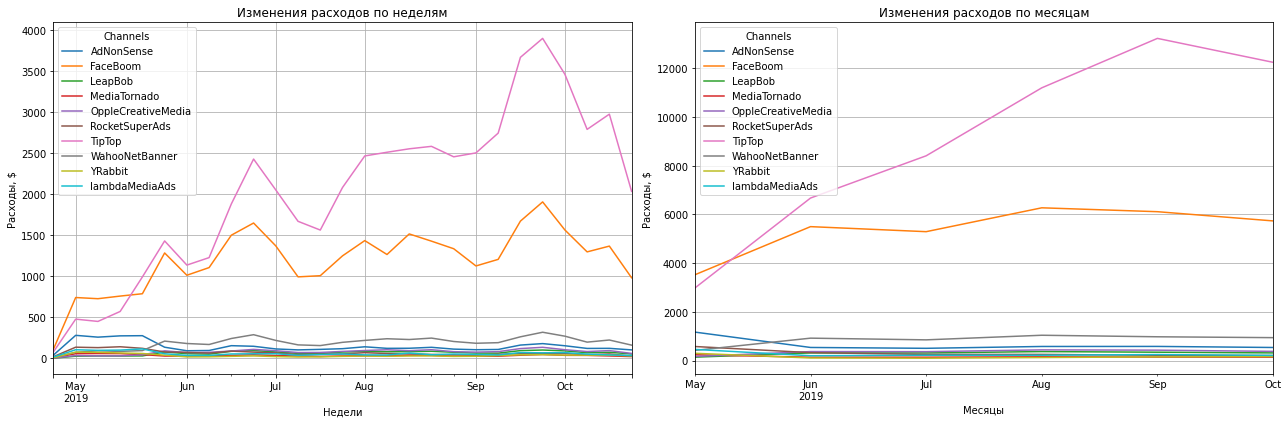

In [25]:
# visualization of the dynamics of cost changes over time 
plt.figure(figsize = (18, 6))

# dynamics of cost changes over weeks
costs_by_week.T.plot(grid=True, ax=plt.subplot(1, 2, 1))
plt.title('Изменения расходов по неделям')
plt.ylabel('Расходы, $')
plt.xlabel('Недели')
plt.legend(title='Channels')

# dynamics of cost changes over months
costs_by_month.T.plot(grid=True, ax=plt.subplot(1, 2, 2))
plt.title('Изменения расходов по месяцам')
plt.ylabel('Расходы, $')
plt.xlabel('Месяцы')
plt.legend(title='Channels')

plt.tight_layout()
plt.show()

The charts again show that the leaders in terms of advertising expenses are 2 channels: TipTop and Faceboom. 

Spending on TipTop grew almost all the time, except for a slump in mid-July, peaked in September, and then began to decline sharply.

Spending on Faceboom remained at about the same level (USD1000-1500 ad spend per week) for most of the period under review, with a peak of USD2000 per week in the second half of September.

In [26]:
# CAC breakdown by acquisition channels

cac_by_channel = (profiles.groupby('channel')['acquisition_cost'].mean()
                  .sort_values(ascending=False)
                  .reset_index()
                 )
cac_by_channel

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


TipTop is the channel with the highest average CAC for the period under consideration.

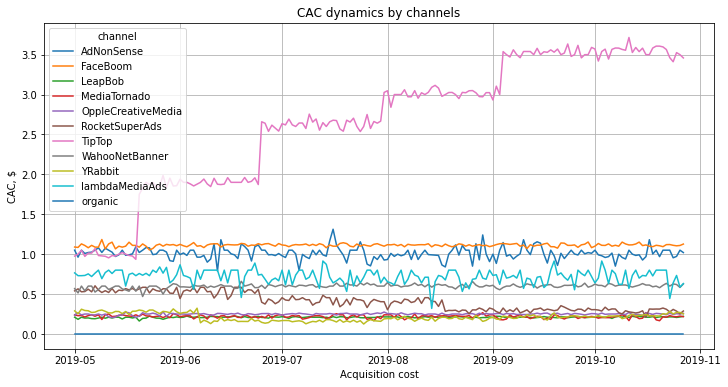

In [27]:
# visualization of CAC dynamics

profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(12, 6))
plt.ylabel('CAC, $')
plt.xlabel('Acquisition cost')
plt.title('САС dynamics by channels')
plt.show()

For most channels, the cost of acquisition did not exceed 1 dollar, only TipTop is an exception - in its case the cost of acquisition increased from month to month and grew from 1 dollar to $ dollars. FaceBoom's CAC kept at the level slightly above 1 dollar throughout the whole period.

## summary
The total marketing budget was USD105497 for the period under review. The most was spent on TipTop and FaceBoom, with the cost of attracting a user through TipTop increasing by USD1-1.5 per month, but remaining at the same level for FaceBoom. 

# LTV, ROI, CAC

In [28]:
# filtering organic users

profiles_filtered = profiles.query('channel != "organic"')
len(profiles_filtered) / len(profiles)

0.6237600661298064

Organic users were filtered out because the cost of attracting them is 0, but using them in calculations can distort the results. The number of rows in the filtered dataframe is 62% of the original one.

In [29]:
# setting the observation and horizon dates

observation_date = datetime(2019, 11, 1).date() 
horizon_days = 14 

In [30]:
# applying functions to get LTV & ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days
)

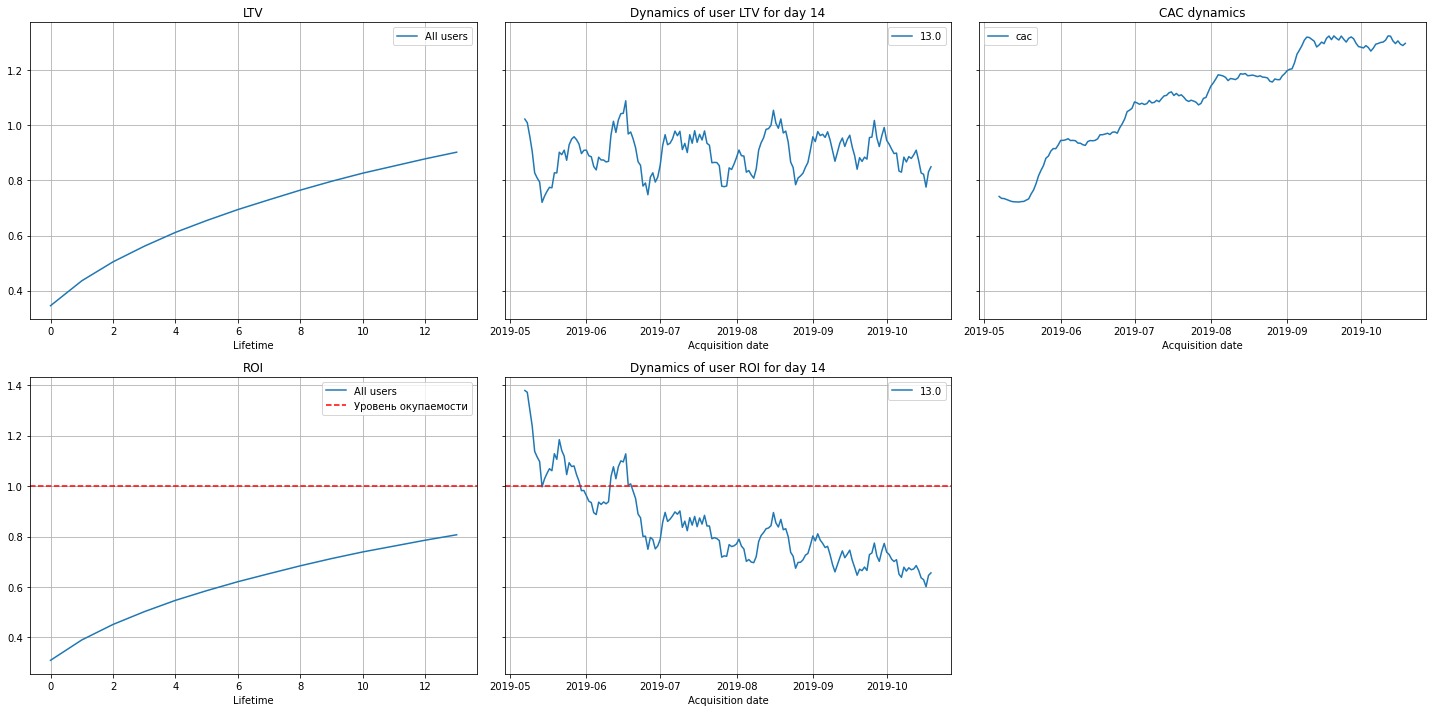

In [31]:
# visualizing

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

The advertisement is not paying off. The ROI at the end of the period in question is approximately 80%.

The cost of user acquisition over two weeks has significantly increased – it's worth investigating why attracting traffic is becoming more expensive and which marketing channels are performing worse (in step 4 we already saw that the CAC for TipTop was increasing week by week, it seems that first of all, attention should be paid to this channel).

The LTV curve is growing, at the end of the period in question, the LTV of attracted users was about 90 cents. LTV fluctuates over time, so it may be necessary to look at separate segments of users to understand the reason for these fluctuations.

In [32]:
# function for applying the rolling average to the columns

def filter_data(df, window):
    
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [33]:
# conversion
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_filtered, orders, observation_date, horizon_days
)

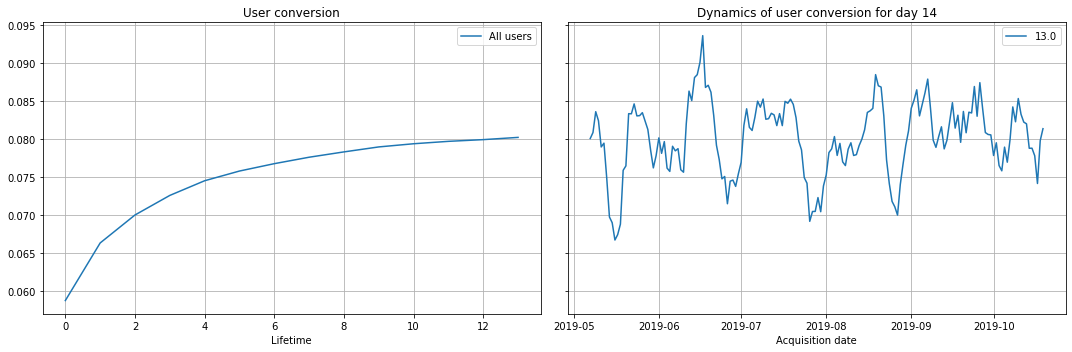

In [34]:
# visualizing conversion
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

The conversion graph is as expected - it is growing, although it is still far from 1.

In [35]:
# retention

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_filtered, visits, observation_date, horizon_days
)

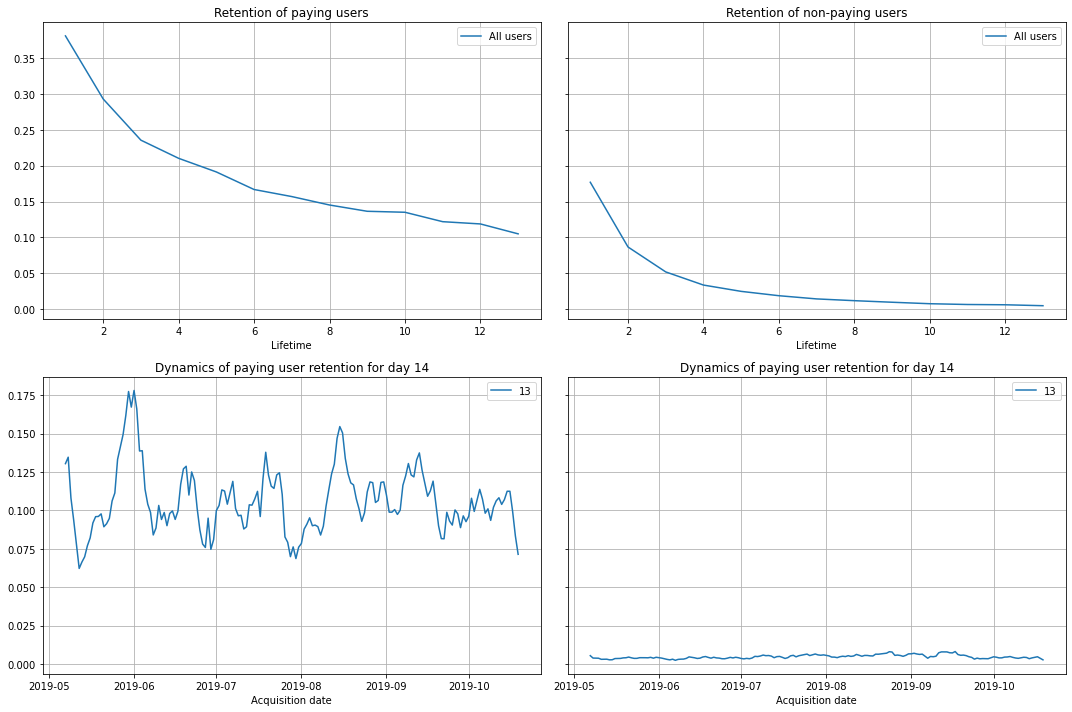

In [36]:
# visualizing retention
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

The retention curves for payers and non-payers are smoothly and predictably decreasing. The retention dynamics for non-payers remains at approximately the same level. The retention dynamics for payers jumps from day to day.

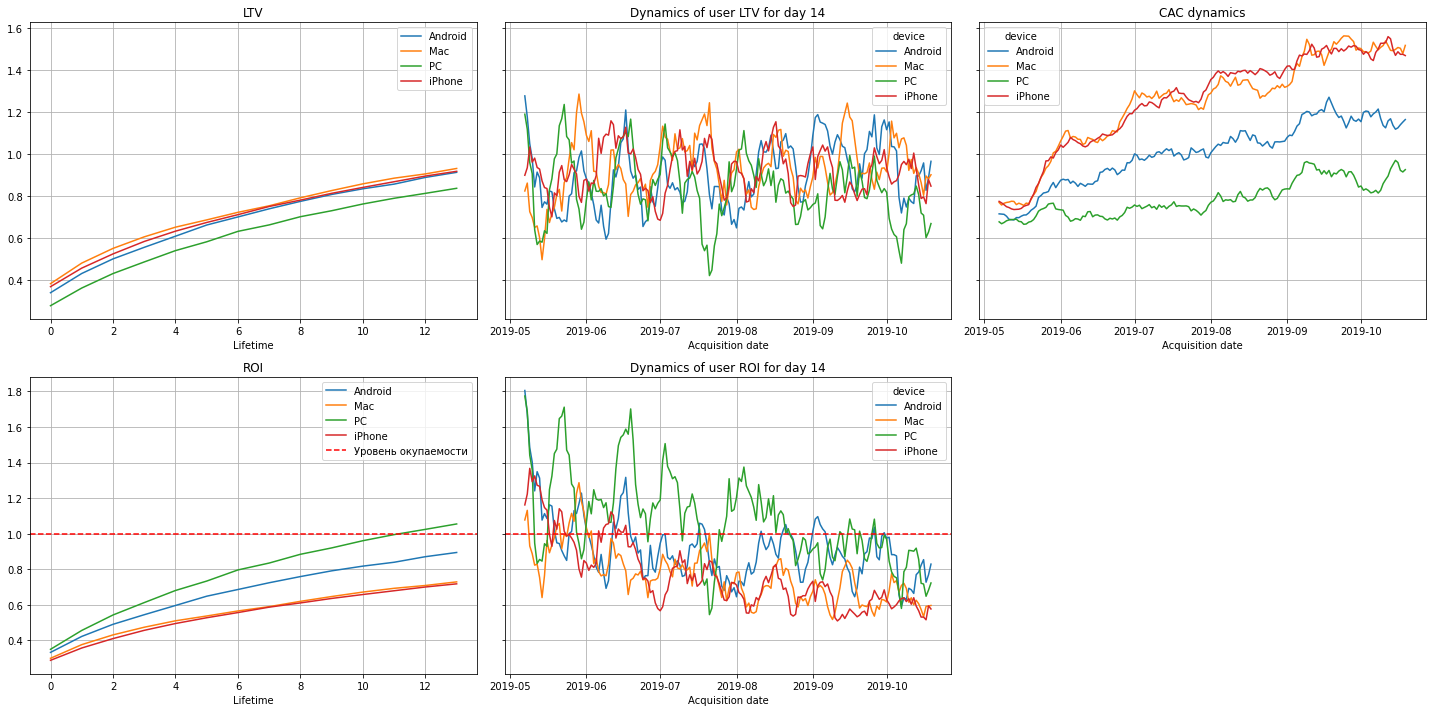

In [37]:
# LTV, ROI, CAC by device

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
) 

- Advertising pays off only for PC users.
- PC users also have the lowest cost of acquisition, while the cost of acquisition for Mac and iPhone users has been increasing over the period under review. 

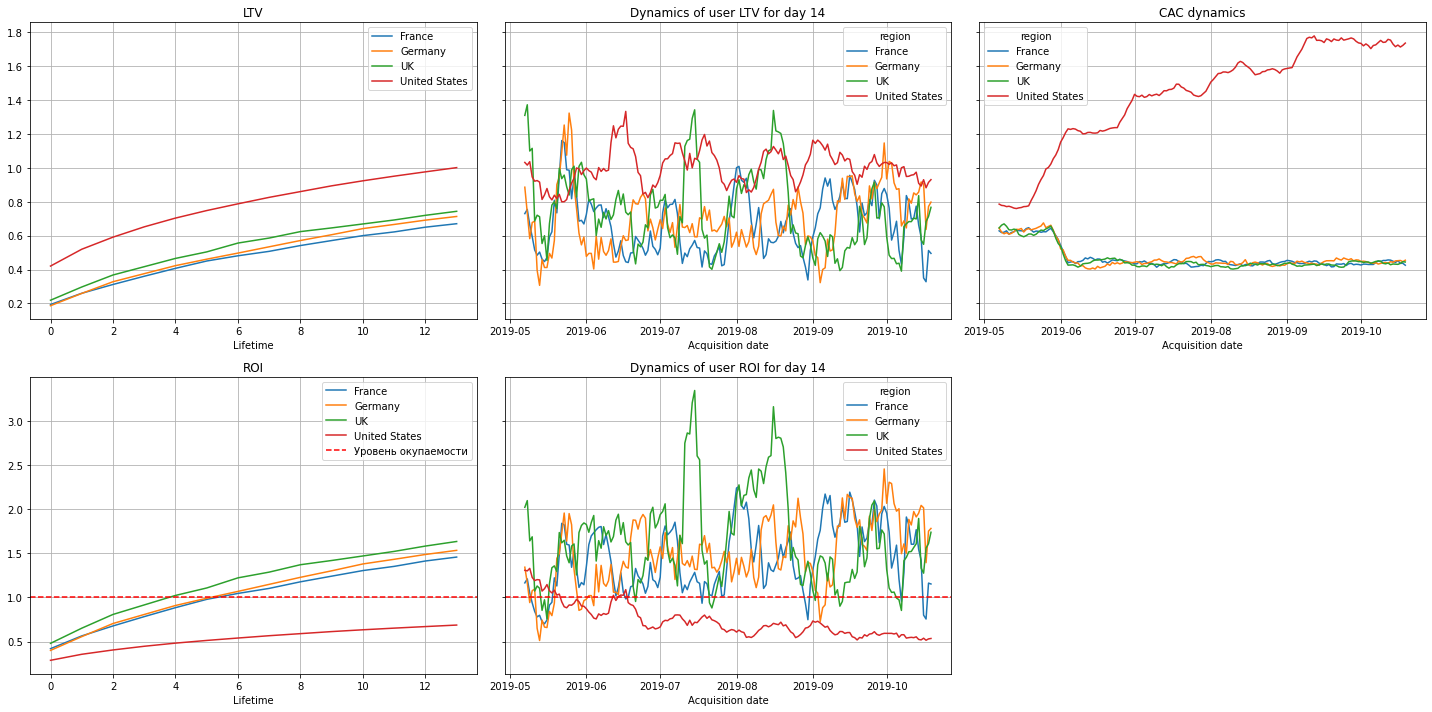

In [38]:
#  LTV, ROI, CAC by region

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7
) 

According to the charts with a breakdown by country, we see that users from the USA are clearly standing out. They do not pay off, and the cost of attracting them is growing.

In [39]:
# creating a df with profiles from the US

profiles_us = profiles_filtered.query('region == "United States"')
profiles_us

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
8,58263264,2019-05-11 19:18:43,FaceBoom,iPhone,United States,2019-05-11,2019-05-01,False,1.128205
9,59835779,2019-05-11 21:13:47,MediaTornado,iPhone,United States,2019-05-11,2019-05-01,False,0.250435
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


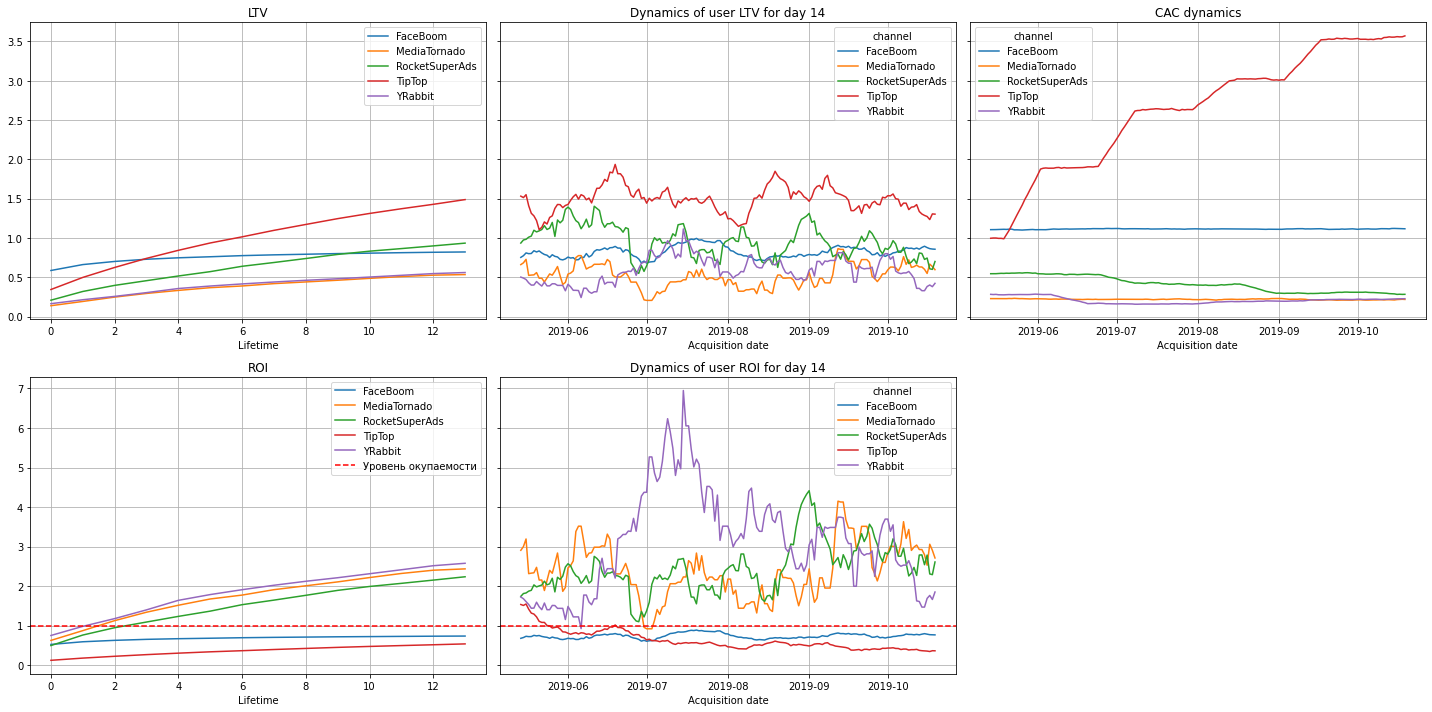

In [40]:
# LTV, ROI, CAC by channel in the US

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_us, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Three channels of acquisition pay off in the States: YRabbit, MediaTornado, RocketSuperAds. It is important to note that the leaders in terms of advertising costs - FaceBoom and TipTop - do not pay off in the US.

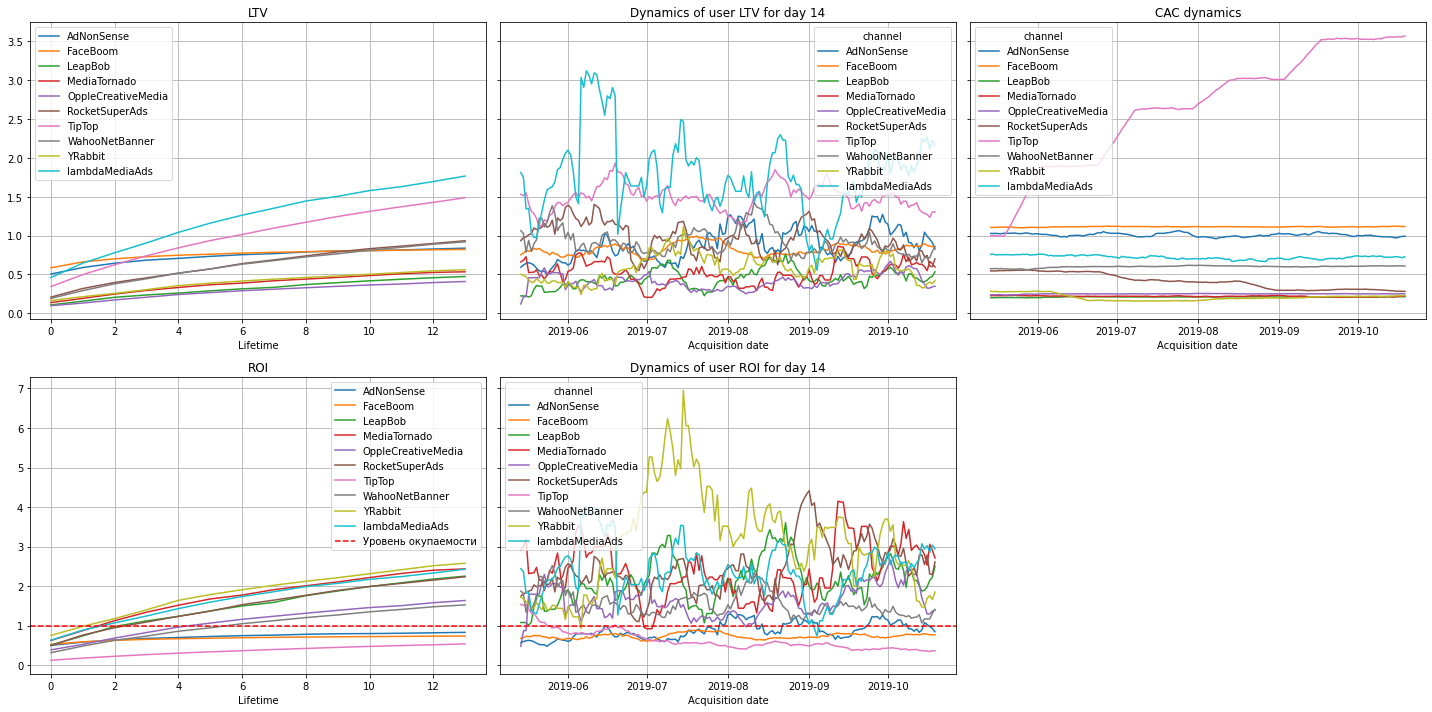

In [41]:
# LTV, ROI, CAC by channel

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_filtered, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

According to the charts with a breakdown by channels of acquisition, we see that TipTop and FaceBoom channels, which, as we saw earlier, are allocated the largest parts of the advertising budget, do not pay off. AdNonSense is also not paying off. In addition, in the case of TipTop, the cost of attracting users is constantly growing. At the same time, we can single out the lambdaMediaAds channel and the highest LTV and ROI, as well as such channels as YRabbit and MediaTornado with good ROI.

In the previous steps of the analysis, we found that the following categories are not paying off:
- Mac and iPhone users;
- US users.

Let's look at these conversion and retention rates of these users separately, perhaps this will allow us to formulate a hypothesis about the reasons for the ROI problems.

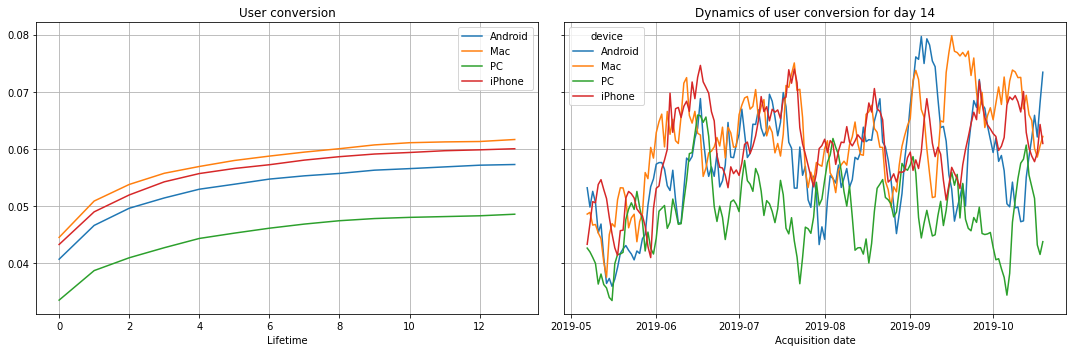

In [42]:
dimensions = ['device']

# conversion breakdown by devices
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

iPhone and Mac users convert even better than PC users. Clearly, the problem isn't conversion.

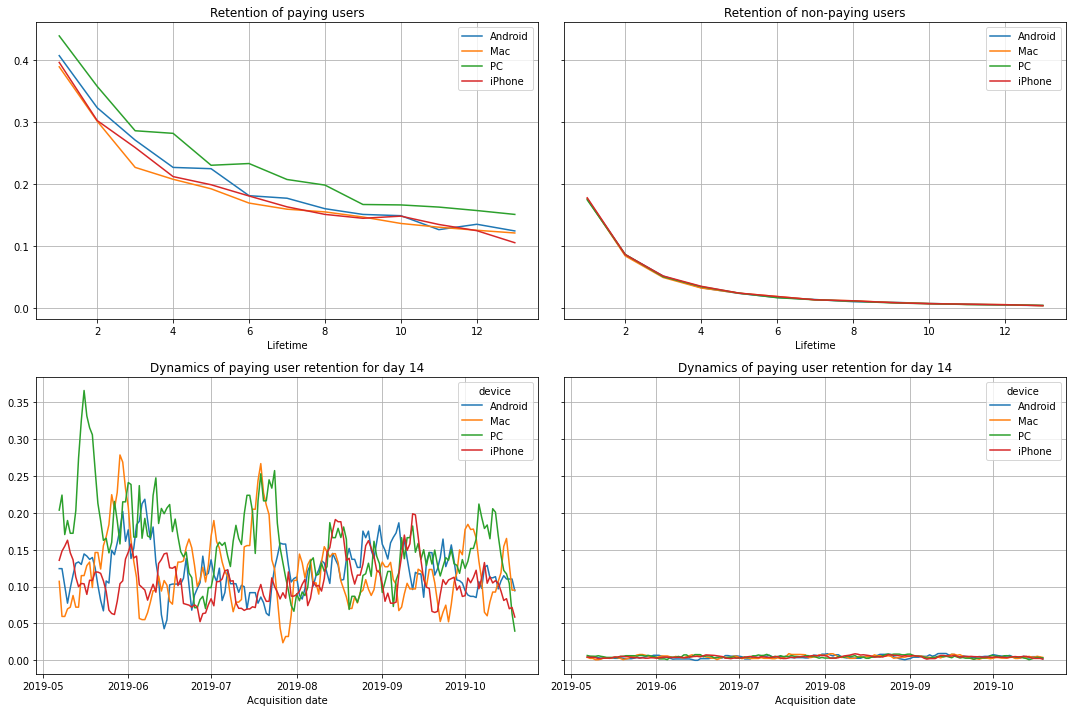

In [43]:
# retention breakdown by devices

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Retention of paying users on iPhone and Mac is worse than on PC and Anroid. It seems worth checking if users of Apple devices are encountering technical issues that negatively affect retention.

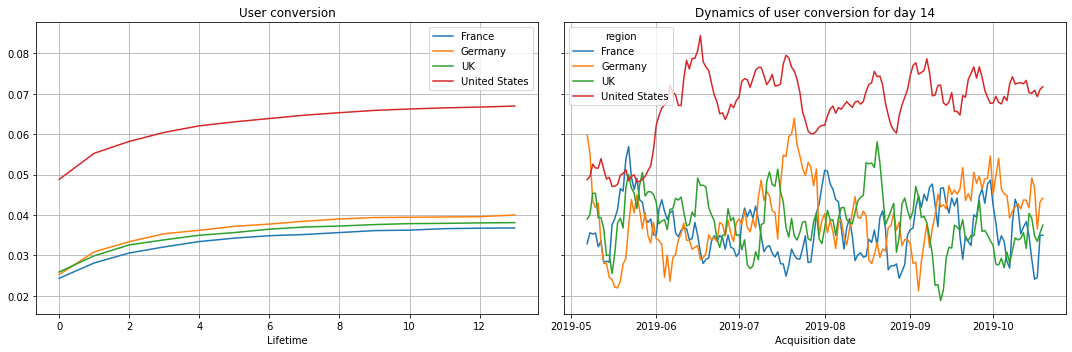

In [44]:
dimensions = ['region']

# conversion breakdown by countries
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

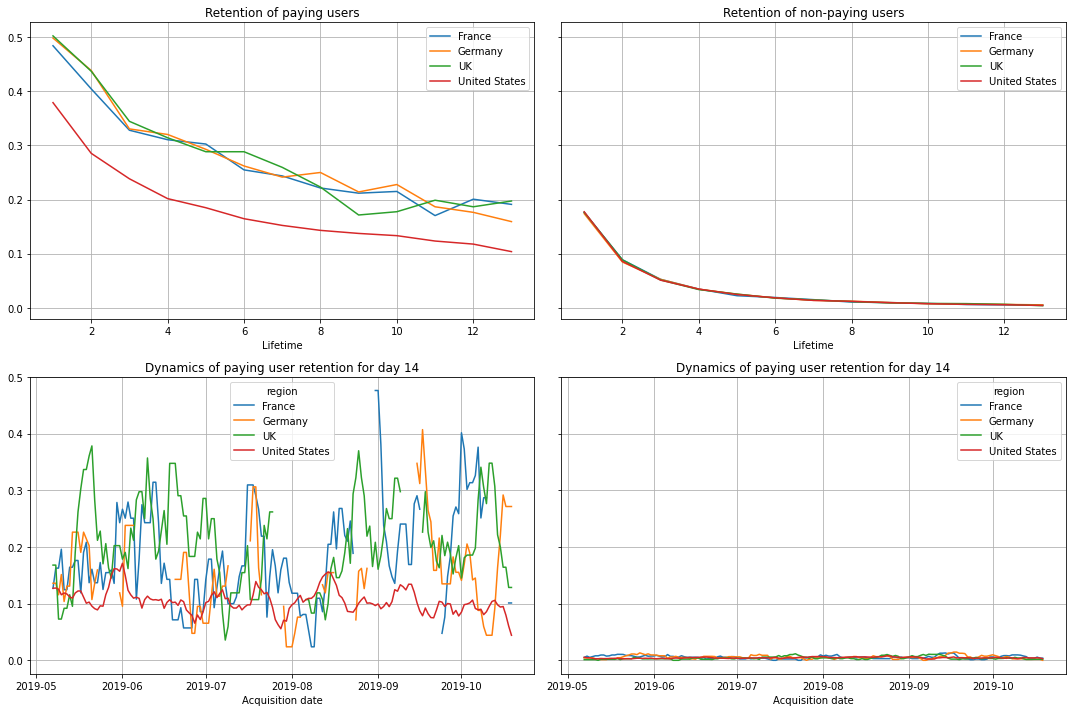

In [45]:
# retention breakdown by countries

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

In the case of conversion and retention by country, we see that users from the States convert just fine, but then retention is consistently the worst. Let's look next at how many users from the States are among paying users, and how many are Mac and iPhone users.

In [46]:
# users by regions

profiles_filtered.groupby('region')['region'].count().sort_values(ascending=False)

region
United States    61829
UK               11154
France           11058
Germany           9528
Name: region, dtype: int64

In [47]:
# users by devices

profiles_filtered.groupby('device')['device'].count().sort_values(ascending=False)

device
iPhone     33882
Android    21841
PC         19153
Mac        18693
Name: device, dtype: int64

Paying users from the States are the largest number of paying users, and that iPhone users are the largest group of paying users. Let's filter the dataframe further, leaving out paying users from the United States with Apple devices, and look at their conversion and retention rates.

In [48]:
profiles_us_apple_devices = profiles_filtered.query('region == "United States" & (device == "Mac" or device == "iPhone")')
len(profiles_us_apple_devices)

42972

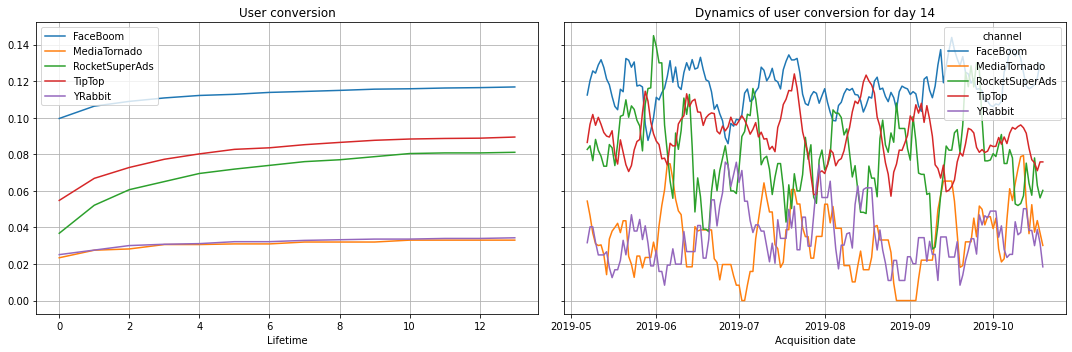

In [49]:
# conversion for US users with Apple devices

dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_us_apple_devices, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

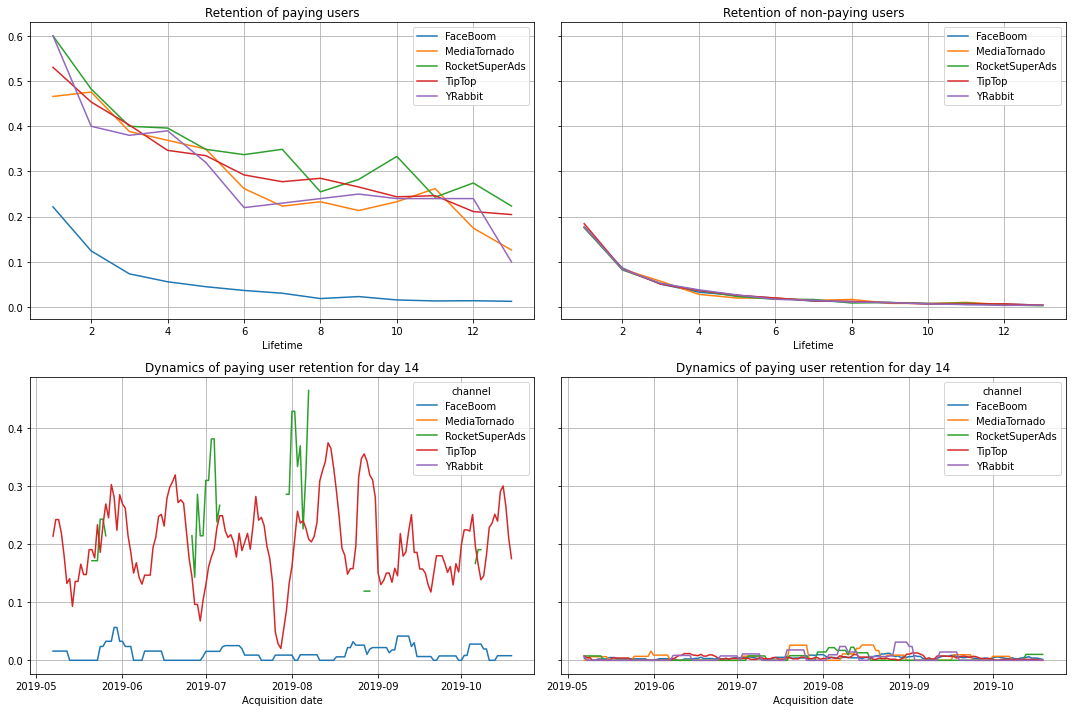

In [50]:
# retention of paying users with Apple devices from the US

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_us_apple_devices, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

FaceBoom channel stands out. Users convert best through it, but then retention is the worst. 
Also for this user segment we can note the RocketSuperAds channel - it is in third place in terms of conversion, and also shows high retention dynamics on some days.

In [51]:
# profiles for users from the EU

profiles_eu = profiles_filtered.query('region == "Germany" or region == "UK" or region == "France"')

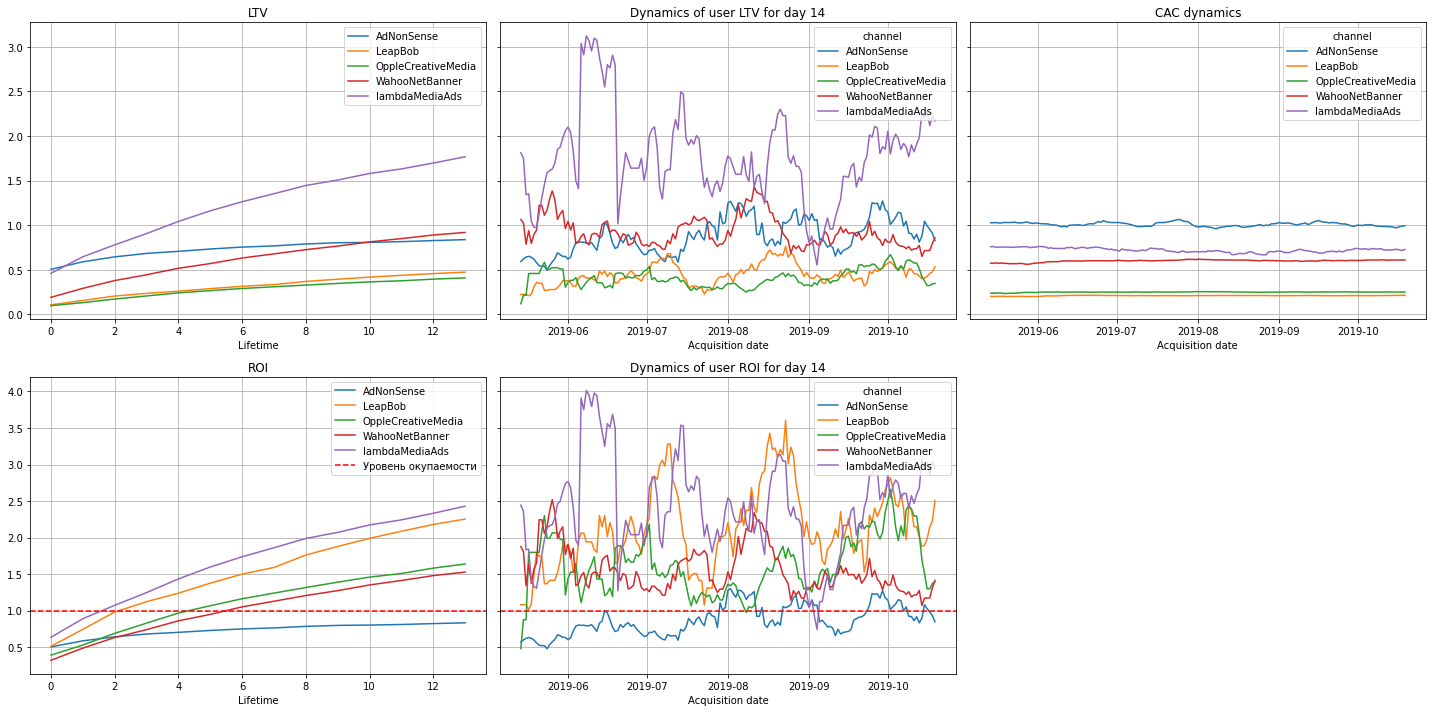

In [52]:
# LTV, ROI, CAC for European users

dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In European countries, 4 out of 5 used channels of attraction pay off. Only AdNonSense does not pay off. LambdaMediaAds shows itself best of all - it has the highest ROI, and the users who came through it have the highest LTV. 

# Conclusions and recommendations

We can draw the following conclusions about the reasons for ineffective user acquisition:
 - The two channels of acquisition, on which most of the advertising budget is spent (FaceBoom and TipTop), do not pay off. 
 - The cost of attracting users through TipTop is constantly increasing.
 - The most paying users of the product are from the US, with the lowest retention.
 - Most paying users have Apple devices, while they also have retention issues.
 - US paying users with apple devices, attracted through FaceBoom, have consistently poor retention.
 - In European countries, the AdNonSense channel does not pay off.  

The following hypotheses and recommendations can be formulated:
- It is necessary to investigate the cause of low retention among users from the States with Apple devices. Do they encounter technical problems when using the app?
- Find out what causes the low retention of paying users from the States attracted through FaceBoom and evaluate the feasibility of using this channel.
- RocketSuperAds channel should probably be used more actively for the States. 
- It may be worth reducing the budget for TipTop, given that it doesn't pay off with the ever-increasing cost of user acquisition.
- In the US, three engagement channels are paying off: YRabbit, MediaTornado, and RocketSuperAds. The marketing department should consider reallocating budget to these channels in the US. 
- In European countries, 4 out of 5 used engagement channels are breaking even. The best performing channel is lambdaMediaAds - it has the highest ROI and the highest LTV for users who came through it. It is worth considering the reallocation of advertising budgets in favor of these channels in Europe.